# Assignment 8 - Linear Regression

## Problem statement 3
A certain organization wants an early estimate of their employee churn out rate. So the HR department gathered the data regarding the employee’s salary hike and the churn out rate in a financial year. The analytics team will have to perform an analysis and predict an estimate of employee churn based on the salary hike. Build a Simple Linear Regression model with churn out rate as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

## 1. Business Problem

1.1 What is the business objective?

- Build a Simple Linear Regression model to estimate the churn out rate of employees based on their salary hike.

- Apply various transformations (logarithmic, exponential, polynomial) to explore model performance.

- Evaluate and compare models using RMSE, R-squared, and correlation coefficient.


1.2 Are there any constraints?

- Only two features are available, which may limit the complexity and accuracy of the model.

- Model assumes a linear or transformable relationship.

- Data may have inconsistencies or outliers.

- Churn can be influenced by many other factors not included in the dataset.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv("emp_data.csv")
data.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


## 2.Data Dictionary
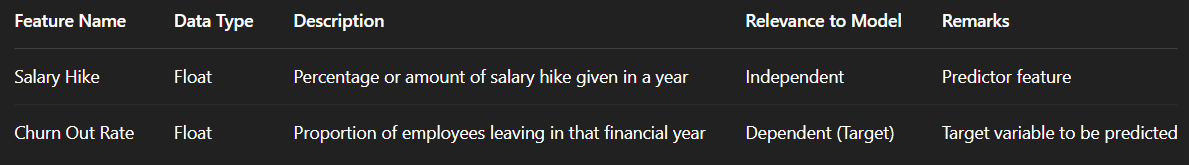

In [25]:
data.shape

(10, 2)

In [26]:
data.dtypes

Salary_hike       int64
Churn_out_rate    int64
dtype: object

## 3.Data Pre processing

In [31]:

#Check for missing values
data.isnull().sum()

Salary_hike       0
Churn_out_rate    0
dtype: int64

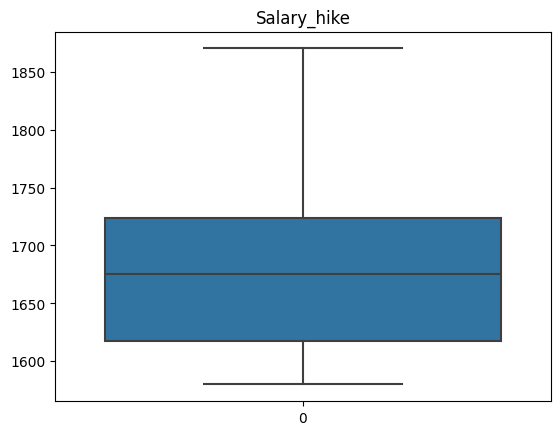

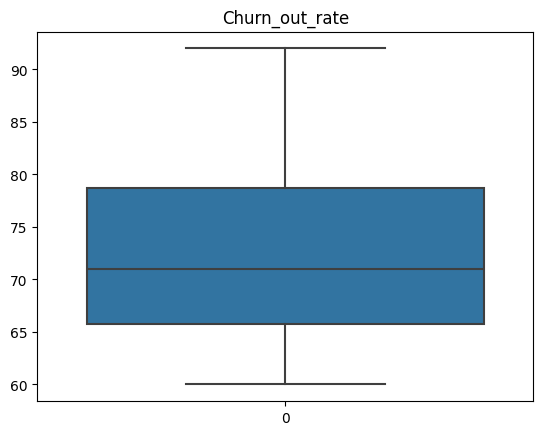

In [32]:
#Check for outliers
for i in data.columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [33]:
#Descriptive statistics
data.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


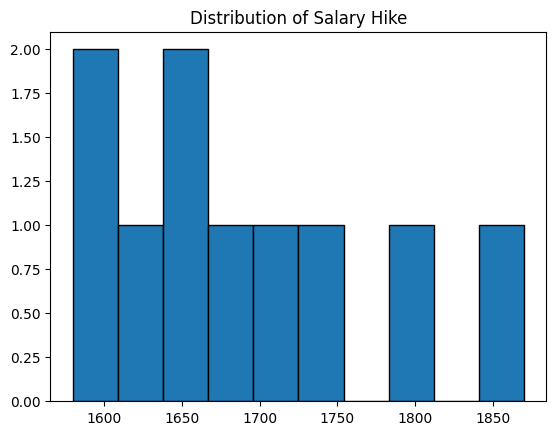

In [34]:
#Univariate Analysis
plt.hist(data['Salary_hike'], bins=10, edgecolor='black')
plt.title("Distribution of Salary Hike")
plt.show()

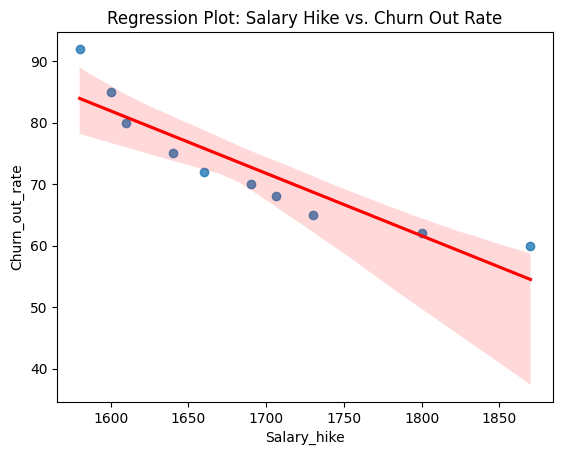

In [36]:
#Bivariate Analysis
#Scatter plot with regression line
sns.regplot(x=data['Salary_hike'], y=data['Churn_out_rate'], line_kws={"color": "red"})
plt.xlabel("Salary_hike")
plt.ylabel("Churn_out_rate")
plt.title("Regression Plot: Salary Hike vs. Churn Out Rate")
plt.show()

## 4.Model Building

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [38]:
#Simple Linear Regression model
X=data[['Salary_hike']]
y=data['Churn_out_rate']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model=LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
#Make predictions
y_pred=model.predict(X_test)

In [42]:
#Evaluate the model
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2=r2_score(y_test, y_pred)
print(f'Simple Linear Regression - RMSE: {rmse}, R-Squared: {r2}')


Simple Linear Regression - RMSE: 2.7570866858265246, R-Squared: 0.9425215350233506


In [43]:
#Apply different transformations and calculate RMSE and correlation coefficient for each model

# Log Transformation
X_log=np.log(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)
model_log=LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log=model_log.predict(X_test_log)

rmse_log=np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2_log=r2_score(y_test_log, y_pred_log)
print(f'Log Transformation - RMSE: {rmse_log}, R-Squared: {r2_log}')


Log Transformation - RMSE: 2.552073090889979, R-Squared: 0.9507517802552383


In [44]:
# Polynomial Transformation
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly=train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly=LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly=model_poly.predict(X_test_poly)

rmse_poly=np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly=r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Transformation - RMSE: {rmse_poly}, R-Squared: {r2_poly}')


Polynomial Transformation - RMSE: 1.4475837451980724, R-Squared: 0.9841550192864902


In [45]:
#Choose the best fit model
best_model=min([(rmse,r2,'Simple Linear Regression'),(rmse_log, r2_log, 'Log Transformation'),(rmse_poly, r2_poly, 'Polynomial Transformation')])

print(f'Best Model: {best_model[2]} with RMSE: {best_model[0]} and R-Squared: {best_model[1]}')

Best Model: Polynomial Transformation with RMSE: 1.4475837451980724 and R-Squared: 0.9841550192864902
